In [3]:
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('C:/MachineLearning/Financial_chatbot/LSTM/Data/new_df.csv')
print(df[:10])

                                       question_list tag_list
0  20영업일 계좌개설 제한 2021.06.09 에 계좌개설했는데 20영업일 계좌개설 ...    <JSK>
1   주식 주문관련금액 주문관련금액에 8만원이 있는데 출금은 못하나고 주문만 할수있는건가요?    <JSK>
2  주식 출금가능금액 질문이요. 제가 학생이라 10만원정도가 있는데 그중 8만정도가 주...    <JSK>
3  가치 투자의 진정한 뜻이. 가치 투자의 진정한 뜻이 궁금합니다.그건 어느 시점에서 ...    <JSK>
4  주식 체결 후 입금이 안 되네요 주식을 매도 했습니다 .보유 주식에도 빠져 나갔구요...    <JSK>
5  주식 출금가능금액 제가 저번주에 주식하나를 매도했는데 주말제외해도 매도한지 4일이 ...    <JSK>
6  증권사개설너무많이 제가 공모주한다고 증권사계좌를 한 5개 만들었는데요.지금 투자할때...    <JSK>
7                                          주식등용문가입비용    <JSK>
8                                매수는 많은데 주가가 떨어지는 이유    <JSK>
9  초능력이 없는것 같아요 초능력이 없는것 같아요 네이버에다가 제가 초능력이 있는것 같...    <JSK>


In [5]:
print(df.isna().sum())

question_list    0
tag_list         0
dtype: int64


c:\big18\python\envs\tensor\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\big18\python\envs\tensor\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\big18\python\envs\tensor\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\big18\python\envs\tensor\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51656 (\N{HANGUL SYLLABLE JIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\big18\python\envs\tensor\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\big18\pyt

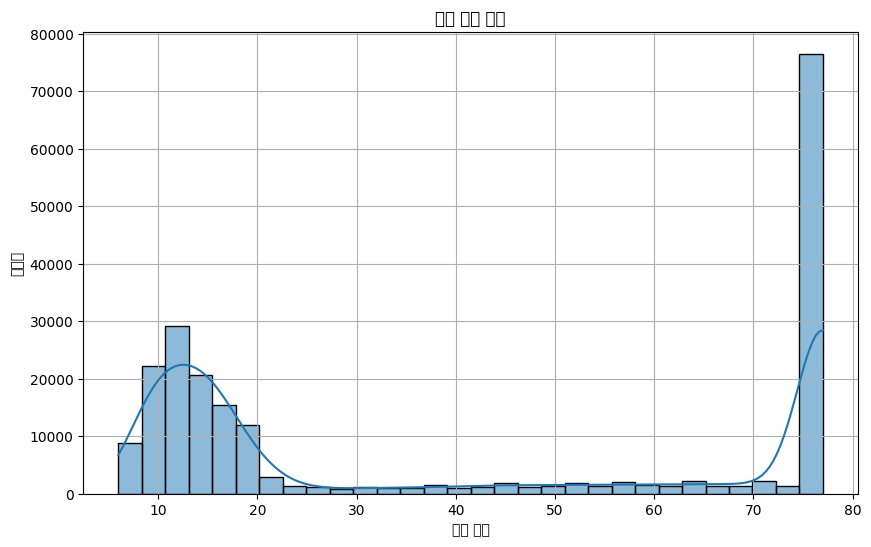

최대 길이: 77
평균 길이: 40.89


In [6]:
question_list = df['question_list']
df['question_list'] = df['question_list'].apply(lambda x: x[:77])
question_list = df['question_list']
tag_list = df['tag_list']

df['question_length'] = df['question_list'].apply(len)

# 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['question_length'], bins=30, kde=True)
plt.title('질문 길이 분포')
plt.xlabel('질문 길이')
plt.ylabel('빈도수')
plt.grid()
plt.show()

max_length = df['question_length'].max()
mean_length = df['question_length'].mean()

# 결과 출력
print(f"최대 길이: {max_length}")
print(f"평균 길이: {mean_length:.2f}")



In [7]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    question_list, target_vocab_size = 2**12
)

KeyboardInterrupt: 

In [ ]:
tokenizer.save_to_file('D:/TJ_FInal_Project/KDJ/Financial_Chatbot/LSTM/Data/Final_tokenizer')

In [8]:
label = []
for tag in tag_list:
    if tag == "<JSK>":
        label.append(0)
    else :
        label.append(1)

In [9]:
df = pd.DataFrame({
    'question_list' : question_list,
    'label' : label
})
print(df[:10])
print(df[-10:])

                                       question_list  label
0  20영업일 계좌개설 제한 2021.06.09 에 계좌개설했는데 20영업일 계좌개설 ...      0
1   주식 주문관련금액 주문관련금액에 8만원이 있는데 출금은 못하나고 주문만 할수있는건가요?      0
2  주식 출금가능금액 질문이요. 제가 학생이라 10만원정도가 있는데 그중 8만정도가 주...      0
3  가치 투자의 진정한 뜻이. 가치 투자의 진정한 뜻이 궁금합니다.그건 어느 시점에서 ...      0
4  주식 체결 후 입금이 안 되네요 주식을 매도 했습니다 .보유 주식에도 빠져 나갔구요...      0
5  주식 출금가능금액 제가 저번주에 주식하나를 매도했는데 주말제외해도 매도한지 4일이 ...      0
6  증권사개설너무많이 제가 공모주한다고 증권사계좌를 한 5개 만들었는데요.지금 투자할때...      0
7                                          주식등용문가입비용      0
8                                매수는 많은데 주가가 떨어지는 이유      0
9  초능력이 없는것 같아요 초능력이 없는것 같아요 네이버에다가 제가 초능력이 있는것 같...      0
              question_list  label
218491         관리범위의 의미 알려줘      1
218492           관리범위 의미 설명      1
218493            관리범위 정의해줘      1
218494        관리범위는 무슨 뜻이야?      1
218495           관리범위 뜻 알려줘      1
218496      관리범위라는 단어 뜻 알려줘      1
218497      관리범위 무슨 뜻인지 알려줘      1
218498     대체 관리범위가 무슨 뜻이야?      1
218499  혹시 관리범위이 무슨 뜻인지 알

In [10]:
df = df.sample(frac=1).reset_index(drop=True)
print(df[:20])

                                        question_list  label
0     한진택배 457017785081 배송이 언제쯤 올까요? 오늘 물건을 받을수 있을까요?      0
1   2004년08월 600p 2005년 03월 1000p 주식포인트 팍스넷에서 줄줄이 ...      0
2                                          화환어음 의미 설명      1
3                                   양도불능신용장에 대해 설명해줘.      1
4                                          국고수지 뜻 알려줘      1
5               토스 증권 계좌 미성년자가 만들려면 어떻게 해야 하나요 ? 만16세      0
6   네이처셀 13000원에 매수했는데 지. 네이처셀 13000원에 매수했는데 지금 주가...      0
7                                  혹시 살충제이 무슨 뜻인지 알아?      1
8                                           종자은행가 뭘까?      1
9                                      반대오퍼에 대해 설명해줘.      1
10  회사에서 받은 우리사주를 팔려고 합니다. 지금은 퇴사한 상태에서 다른 회사로 일을 ...      0
11  주식 강세장 강세장이라는게 주식들의 주가가 올라가고 있는 상황인가요?그리고 초보자들...      0
12  신차 전액할부 시 금융권 신차 전액할부나 선입금 조금 넣어서 구매하려고 하는데알아보...      0
13                  바이낸스 선물거래 레버리지 해서 청산당하면 빚이생기는건가요?      0
14                                      늠전라는 단어 뜻 알려줘      1
15                      

In [11]:
# X_train, y_train, X_test, y_text
data_length = len(df)
X_train = df['question_list'][:round(data_length*0.8)]
y_train = df['label'][:round(data_length*0.8)]
X_test = df['question_list'][-round(data_length*0.2):]
y_test = df['label'][-round(data_length*0.2):]

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

174801
174801
43700
43700


In [12]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.load_from_file('D:/TJ_FInal_Project/KDJ/Financial_Chatbot/LSTM/Data/Final_tokenizer')
maxlength = 77

train_list = []

for train in X_train:
    train = tokenizer.encode(train)
    train_list.append(train)

X_train = tf.keras.preprocessing.sequence.pad_sequences(
    train_list, maxlen=maxlength, padding='post'
)

print(X_train[:10])

[[  82  177 3010 3862 2180 1259  960 3885 3782 3878 3886  227  226  714
     2 2587 3589    6  114 2917   10 2916  346 3893    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [ 426 1990 3878 1669 3862 1487 2191  426 1403 3862 3878 3804 1141 2191
    35 3671 3862 3641   43 2630   27  944  944    2 4067 3985 3970 1262
  1913   29  173   13 2709  140  541 2634   10  273   51 1941 3876 1487
   300   60    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [ 172  307 1347 3862   19   46    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    

In [14]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

vocab_size = tokenizer.vocab_size
print(vocab_size)

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units)))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('D:/TJ_FInal_Project/KDJ/Financial_Chatbot/Model/LSTM.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)


4086
Epoch 1/15
2183/2185 [============================>.] - ETA: 0s - loss: 0.0212 - acc: 0.9951
Epoch 1: val_acc improved from -inf to 0.99980, saving model to C:/MachineLearning/Financial_chatbot/Model\best_model.h5
2185/2185 [==============================] - 48s 20ms/step - loss: 0.0212 - acc: 0.9951 - val_loss: 0.0011 - val_acc: 0.9998
Epoch 2/15
2183/2185 [============================>.] - ETA: 0s - loss: 0.0031 - acc: 0.9994
Epoch 2: val_acc improved from 0.99980 to 0.99989, saving model to C:/MachineLearning/Financial_chatbot/Model\best_model.h5
2185/2185 [==============================] - 43s 20ms/step - loss: 0.0031 - acc: 0.9994 - val_loss: 0.0012 - val_acc: 0.9999
Epoch 3/15
2184/2185 [============================>.] - ETA: 0s - loss: 7.9516e-04 - acc: 0.9999
Epoch 3: val_acc improved from 0.99989 to 0.99991, saving model to C:/MachineLearning/Financial_chatbot/Model\best_model.h5
2185/2185 [==============================] - 43s 20ms/step - loss: 7.9479e-04 - acc: 0.9999 -

In [15]:
test_list = []

for test in X_test:
    test = tokenizer.encode(test)
    test_list.append(test)

X_test = tf.keras.preprocessing.sequence.pad_sequences(
    test_list, maxlen=77, padding='post'
)

print(X_test[:10])

[[1137 2813   39   64   18    9    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [  40 4066 3963 4014  220  704  782  992    8    4   65 3893    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   7 1100 3862  159  124 2845 3862   15 1196 1246    7 3881  884 1485
    17 3881  409  124  429  378   25  741 3867   13 1514 1198  855   13
  3881  884  238 3567 3862  472   14  219    0    0    0    

In [17]:
loaded_model = load_model('D:/TJ_FInal_Project/KDJ/Financial_Chatbot/Model/LSTM.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))


1366/1366 [==============================] - 10s 7ms/step - loss: 6.1073e-04 - acc: 1.0000

 테스트 정확도: 1.0000


In [ ]:
while True:
    question = input('질문해! : ')
    if question == "끝!":
        break
    tokenied_question=[]
    tokenied_question.append(tokenizer.encode(question))
    final_question = tf.keras.preprocessing.sequence.pad_sequences(
        tokenied_question, maxlen=77, padding='post'
    )
    score = float(loaded_model.predict(final_question))

    if(score > 0.5):
        print("{:.2f}% 확률로 <DICT>\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 <JSK>.\n".format((1 - score) * 100))

print(final_question)

1/1 [==============================] - 0s 17ms/step
100.00% 확률로 <JSK>.

1/1 [==============================] - 0s 33ms/step
100.00% 확률로 <JSK>.

1/1 [==============================] - 0s 16ms/step
99.81% 확률로 <JSK>.

1/1 [==============================] - 0s 27ms/step
100.00% 확률로 <JSK>.

1/1 [==============================] - 0s 17ms/step
100.00% 확률로 <DICT>

1/1 [==============================] - 0s 24ms/step
99.81% 확률로 <JSK>.

1/1 [==============================] - 0s 11ms/step
99.81% 확률로 <JSK>.

